In [16]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


1.1. Należy wczytać dane.
1.2. Sprawdzić podstawowe statystyki.
1.3. Sprawdzić kompletność danych.

In [3]:

iris_db= pd.read_csv('iris.csv')
print(iris_db.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [4]:
print(iris_db.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [5]:
print(iris_db.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [6]:
print(iris_db.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


1.4. Przeprowadzić normalizację danych w zakresie [0,1] na kolumnach (z wyłączeniem
kolumny species).

In [11]:
iris_columns_to_normalize = iris_db.columns[:-1]

scaler = MinMaxScaler()

iris_normalized_0_1 = iris_db.copy()
iris_normalized_0_1[iris_columns_to_normalize] = scaler.fit_transform(iris_db[iris_columns_to_normalize])

print(iris_normalized_0_1.head()) 


   sepal_length  sepal_width  petal_length  petal_width species
0      0.222222     0.625000      0.067797     0.041667  setosa
1      0.166667     0.416667      0.067797     0.041667  setosa
2      0.111111     0.500000      0.050847     0.041667  setosa
3      0.083333     0.458333      0.084746     0.041667  setosa
4      0.194444     0.666667      0.067797     0.041667  setosa


1.5. Przeprowadzić normalizację danych w zakresie [-1,1] na kolumnach (z wyłączeniem
kolumny species)

In [12]:
scaler = MinMaxScaler(feature_range=(-1, 1))

iris_normalized_neg1_1 = iris_db.copy()
iris_normalized_neg1_1[iris_columns_to_normalize] = scaler.fit_transform(iris_db[iris_columns_to_normalize])

print(iris_normalized_neg1_1.head()) 


   sepal_length  sepal_width  petal_length  petal_width species
0     -0.555556     0.250000     -0.864407    -0.916667  setosa
1     -0.666667    -0.166667     -0.864407    -0.916667  setosa
2     -0.777778     0.000000     -0.898305    -0.916667  setosa
3     -0.833333    -0.083333     -0.830508    -0.916667  setosa
4     -0.611111     0.333333     -0.864407    -0.916667  setosa


1.6. Przeprowadzić standaryzację danych na kolumnach (z wyłączeniem kolumny
species).

In [14]:
scaler = StandardScaler()

iris_db_standardized = iris_db.copy()
iris_db_standardized[iris_columns_to_normalize] = scaler.fit_transform(iris_db[iris_columns_to_normalize])

print(iris_db_standardized.head())


   sepal_length  sepal_width  petal_length  petal_width species
0     -0.900681     1.032057     -1.341272    -1.312977  setosa
1     -1.143017    -0.124958     -1.341272    -1.312977  setosa
2     -1.385353     0.337848     -1.398138    -1.312977  setosa
3     -1.506521     0.106445     -1.284407    -1.312977  setosa
4     -1.021849     1.263460     -1.341272    -1.312977  setosa


1.7. Narysować wykres zbiorczy, składający się z 4 wykresów, zależności długości płatka
[cm] od szerokości płatka [cm] różnicowany na podstawie gatunku dla danych
pierwotnych, znormalizowanych w zakresie [0,1], znormalizowanych w zakresie [-
1,1] oraz standaryzowanych.

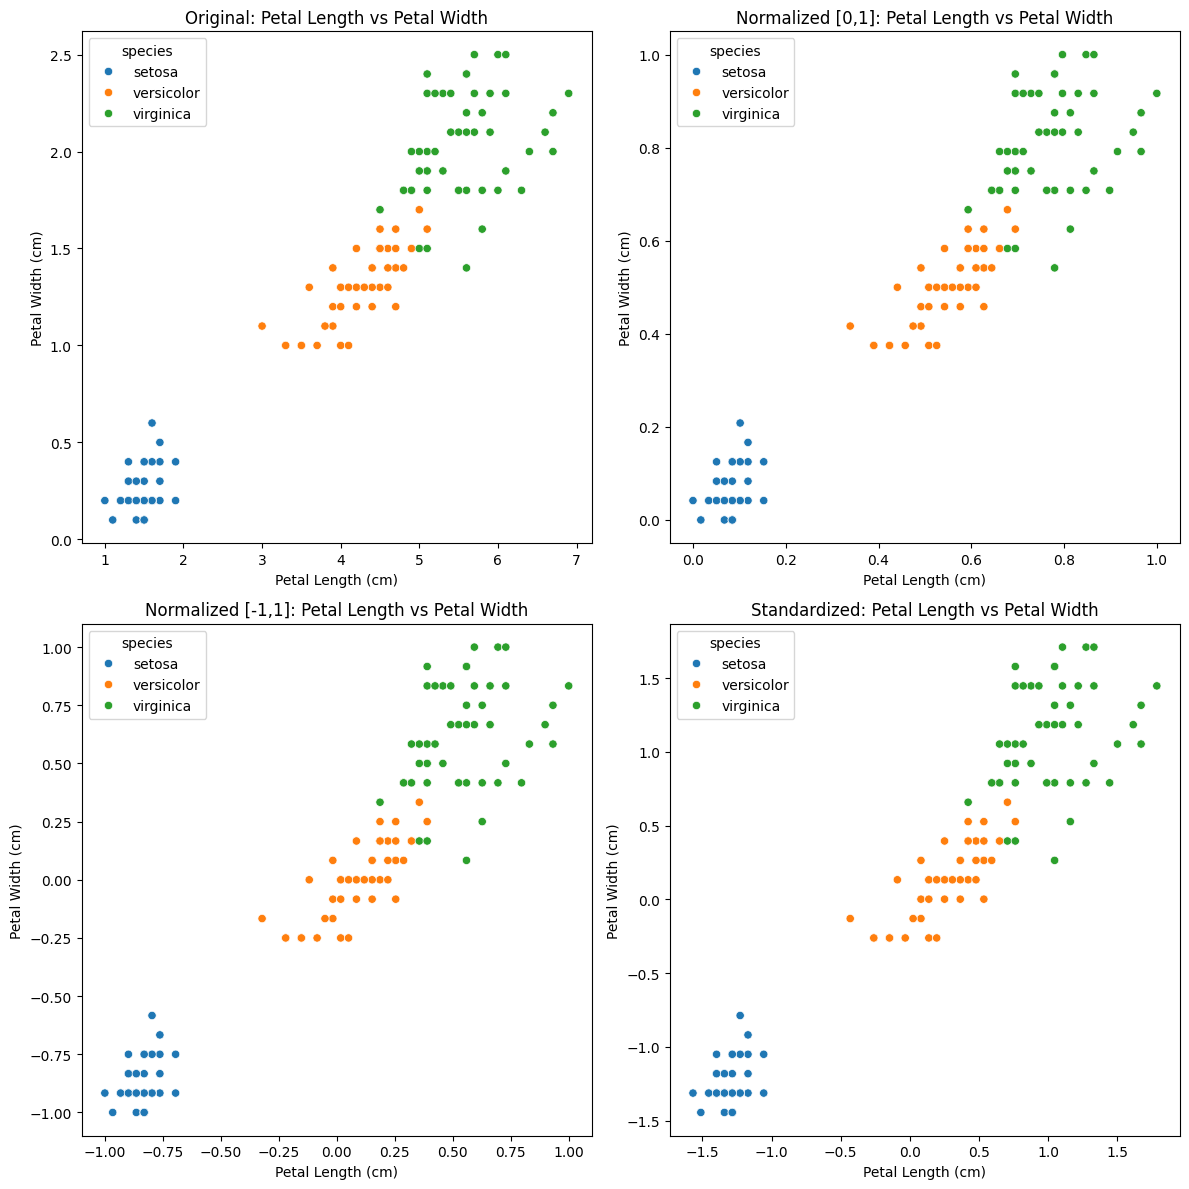

In [18]:
datasets = {
    'Original': iris_db,
    'Normalized [0,1]': iris_normalized_0_1,
    'Normalized [-1,1]': iris_normalized_neg1_1,
    'Standardized': iris_db_standardized
}

plt.figure(figsize=(12, 12))
for i, (key, dataset) in enumerate(datasets.items(), 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(
        x=dataset['petal_length'], 
        y=dataset['petal_width'], 
        hue=dataset['species']
    )
    plt.title(f'{key}: Petal Length vs Petal Width')
    plt.xlabel('Petal Length (cm)')
    plt.ylabel('Petal Width (cm)')

plt.tight_layout()
plt.show()


1.8. Narysować wykres zbiorczy, składający się z 4 wykresów, zależności długości
kielicha [cm] od szerokości kielicha [cm] różnicowany na podstawie gatunku dla
danych pierwotnych, znormalizowanych w zakresie [0,1], znormalizowanych w
zakresie [-1,1] oraz standaryzowanych.

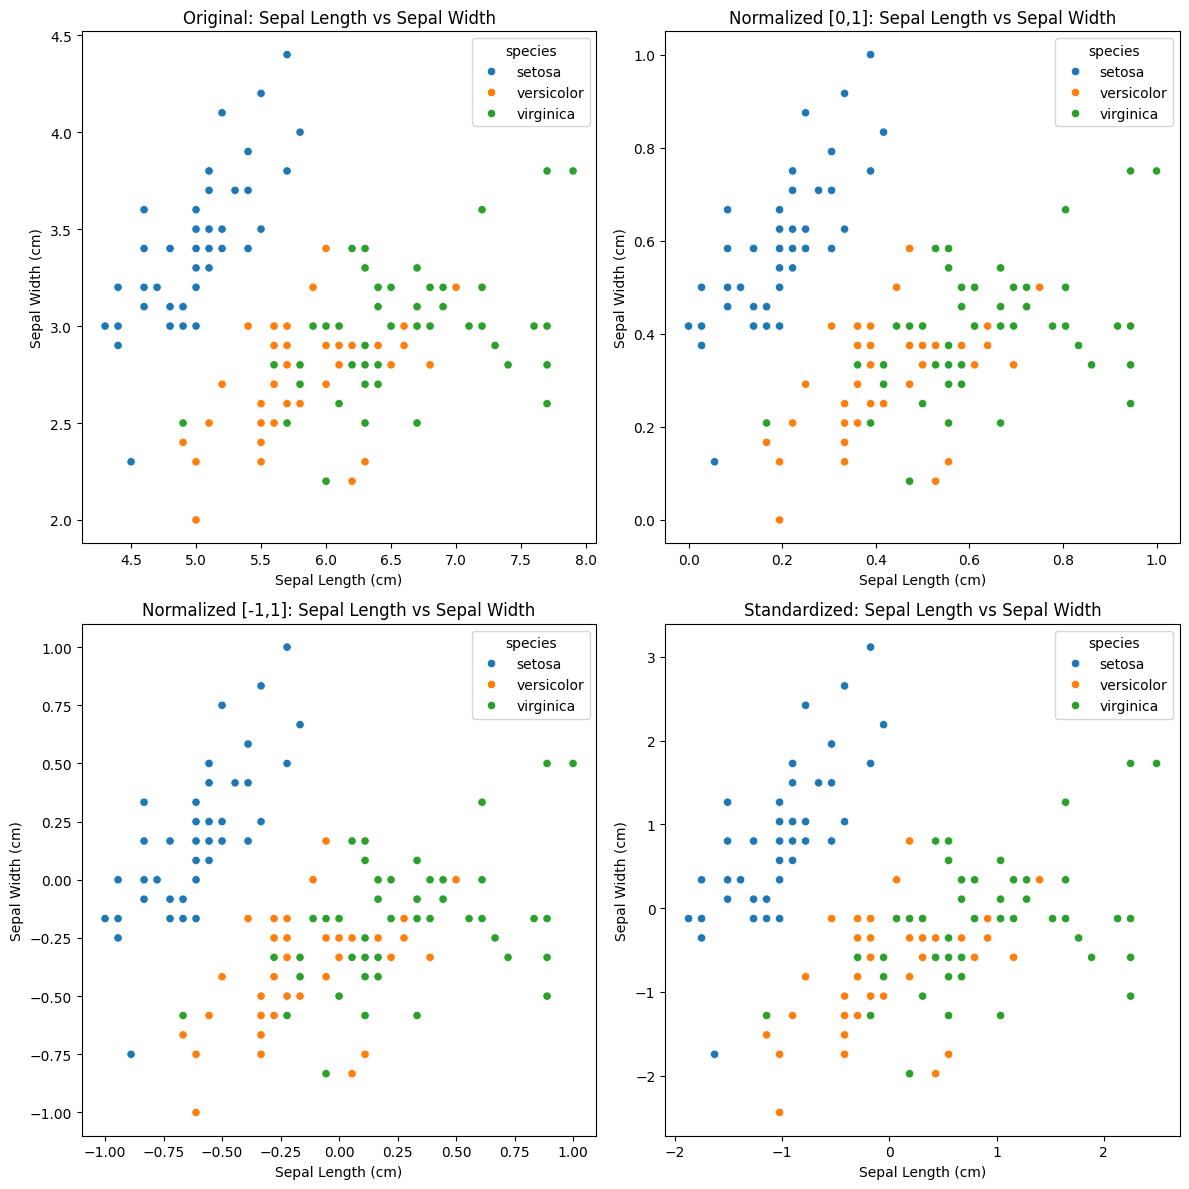

In [19]:
plt.figure(figsize=(12, 12))
for i, (key, dataset) in enumerate(datasets.items(), 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(
        x=dataset['sepal_length'], 
        y=dataset['sepal_width'], 
        hue=dataset['species']
    )
    plt.title(f'{key}: Sepal Length vs Sepal Width')
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Sepal Width (cm)')

plt.tight_layout()
plt.show()